# Population in Ireland

# Adım 1: Veri Ön İşleme ve Temizleme

## 1. Veri setinin yüklenmesi ve temel kontrol

In [1]:
import pandas as pd               # Used for data analysis and processing.
import numpy as np                # Used for multi-dimensional arrays and mathematical operations.
import seaborn as sns             # Provides a high-level interface for data visualization.
import matplotlib.pyplot as plt   # Used for creating plots and graphs.
%matplotlib inline
sns.set(color_codes=True)

In [2]:
import math
from scipy.stats import poisson

In [3]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [4]:
df=pd.read_csv("PEA01-3.csv") # we read dataset

In [5]:
df.head(5) # We dispplay first 5 rows

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,0 - 14 years,Both sexes,Thousand,NaN
1,Population Estimates (Persons in April),1950,0 - 14 years,Male,Thousand,434.6
2,Population Estimates (Persons in April),1950,0 - 14 years,Female,Thousand,416.6
3,Population Estimates (Persons in April),1950,15 - 24 years,Both sexes,Thousand,452.6
4,Population Estimates (Persons in April),1950,15 - 24 years,Male,Thousand,234.9


In [6]:
df.tail(5) # We display last 5 rows

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
1327,Population Estimates (Persons in April),2023,65 years and over,Male,Thousand,379.9
1328,Population Estimates (Persons in April),2023,65 years and over,Female,Thousand,426.4
1329,Population Estimates (Persons in April),2023,All ages,Both sexes,Thousand,5281.6
1330,Population Estimates (Persons in April),2023,All ages,Male,Thousand,2606.2
1331,Population Estimates (Persons in April),2023,All ages,Female,Thousand,2675.4


In [7]:
df.sample(5)

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
264,Population Estimates (Persons in April),1964,65 years and over,Both sexes,Thousand,320.5
669,Population Estimates (Persons in April),1987,15 - 24 years,Both sexes,Thousand,615.8
728,Population Estimates (Persons in April),1990,25 - 44 years,Female,Thousand,477.3
1308,Population Estimates (Persons in April),2022,65 years and over,Both sexes,Thousand,781.3
671,Population Estimates (Persons in April),1987,15 - 24 years,Female,Thousand,302.8


In [8]:
# We calculate how many we have rows and columns with shape method
total_rows=df.shape[0]
total_columns=df.shape[1]
print(f"Total Rows= {total_rows}")
print(f"Total Columns= {total_columns}")

Total Rows= 1332
Total Columns= 6


In [9]:
df.describe() # We use this method to see summary of columns numerical (numeric) data

,Year,VALUE
count,1332.000000,1318.000000
mean,1986.500000,808.058877
std,21.368032,868.888579
min,1950.000000,149.300000
25%,1968.000000,310.775000
50%,1986.500000,477.700000
75%,2005.000000,870.475000
max,2023.000000,5281.600000


In [10]:
df.describe(include="object") # We use this method to see summary of columns containing categorical (object) data

,STATISTIC Label,Age Group,Sex,UNIT
count,1332,1332,1332,1332
unique,1,6,3,1
top,Population Estimates (Persons in April),0 - 14 years,Both sexes,Thousand
freq,1332,222,444,1332


In [11]:
df.dtypes # We use this method to see the data types of each columns

STATISTIC Label     object
Year                 int64
Age Group           object
Sex                 object
UNIT                object
VALUE              float64
dtype: object

## 2. Temizlik ve veri önişleme 

In [12]:
df.nunique() # We use this method to find the count of different values in each column.

STATISTIC Label       1
Year                 74
Age Group             6
Sex                   3
UNIT                  1
VALUE              1214
dtype: int64

In [13]:
df.count() # We use this method to calculate the number of non-null (non-NaN) values in each column.

STATISTIC Label    1332
Year               1332
Age Group          1332
Sex                1332
UNIT               1332
VALUE              1318
dtype: int64

In [14]:
df.isnull().sum() # We use this method to calculate the number of null (NaN) values in each column.

STATISTIC Label     0
Year                0
Age Group           0
Sex                 0
UNIT                0
VALUE              14
dtype: int64

In [15]:
df.duplicated().sum() # We use this method to calculate the number of duplicated rows

0

In [16]:
# We drop some columns which we do not use because these columns include just one unique value
to_drop=["STATISTIC Label","UNIT"] 
df.drop(columns=to_drop,inplace=True)

In [17]:
# We rename the 'VALUE' column to maintain consistent column title style.
df=df.rename(columns={"VALUE":"Value"})

In [18]:
df["Value"]=(df["Value"]/1000) # We converted the value from thousand to million
# we changed the value because we drop UNIT column where it is writing exact value label

In [19]:
#df["Value"]

In [20]:
missing_df=df[df.isna().any(axis=1)] #missing data rows
missing_df

,Year,Age Group,Sex,Value
0,1950,0 - 14 years,Both sexes,NaN
72,1954,0 - 14 years,Both sexes,NaN
216,1962,0 - 14 years,Both sexes,NaN
234,1963,0 - 14 years,Both sexes,NaN
360,1970,0 - 14 years,Both sexes,NaN
396,1972,0 - 14 years,Both sexes,NaN
522,1979,0 - 14 years,Both sexes,NaN
576,1982,0 - 14 years,Both sexes,NaN
684,1988,0 - 14 years,Both sexes,NaN
774,1993,0 - 14 years,Both sexes,NaN


In [21]:
import pandas as pd
import numpy as np

# df, veri setinizi temsil etmektedir.

# Her yıl ve yaş grubu için 'Male' ve 'Female' cinsiyetlerinin 'Value' değerlerini toplayın
grouped_values = df[(df['Sex'] == 'Male') | (df['Sex'] == 'Female')].groupby(['Year', 'Age Group'])['Value'].sum().reset_index()

# 'Both sexes' için eksik 'Value' değerlerini bu toplamlarla doldurun
for index, row in grouped_values.iterrows():
    year = row['Year']
    age_group = row['Age Group']
    total_value = row['Value']

    # Eksik değerleri toplam değerle doldurun
    df.loc[(df['Year'] == year) & (df['Age Group'] == age_group) & (df['Sex'] == 'Both sexes') & (df['Value'].isna()), 'Value'] = total_value

# Sonuçları kontrol edin
print(df)


      Year          Age Group         Sex   Value
0     1950       0 - 14 years  Both sexes  0.8512
1     1950       0 - 14 years        Male  0.4346
2     1950       0 - 14 years      Female  0.4166
3     1950      15 - 24 years  Both sexes  0.4526
4     1950      15 - 24 years        Male  0.2349
...    ...                ...         ...     ...
1327  2023  65 years and over        Male  0.3799
1328  2023  65 years and over      Female  0.4264
1329  2023           All ages  Both sexes  5.2816
1330  2023           All ages        Male  2.6062
1331  2023           All ages      Female  2.6754

[1332 rows x 4 columns]


In [22]:
all_0_14=df[(df["Age Group"]=="0 - 14 years")]
all_0_14

,Year,Age Group,Sex,Value
0,1950,0 - 14 years,Both sexes,0.8512
1,1950,0 - 14 years,Male,0.4346
2,1950,0 - 14 years,Female,0.4166
18,1951,0 - 14 years,Both sexes,0.8548
19,1951,0 - 14 years,Male,0.4364
...,...,...,...,...
1297,2022,0 - 14 years,Male,0.5190
1298,2022,0 - 14 years,Female,0.4953
1314,2023,0 - 14 years,Both sexes,1.0116
1315,2023,0 - 14 years,Male,0.5165


In [73]:
import ipywidgets as widgets
from IPython.display import display

# Identify options
year_option = df['Year'].unique()
age_group_option = df['Age Group'].unique()
sex_option = df['Sex'].unique()

# Create dropdown widget
dropdown_year = widgets.Dropdown(options=year_option,description="Year:")
dropdown_age_group = widgets.Dropdown(options=age_group_option,description="Age Group:")
dropdown_sex = widgets.Dropdown(options=sex_option,description="Sex:")

# Show Widget
print("Please select a option!")
display(dropdown_year)
display(dropdown_age_group)
display(dropdown_sex)

Please select a option!


Dropdown(description='Year:', options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,…

Dropdown(description='Age Group:', options=('0 - 14 years', '15 - 24 years', '25 - 44 years', '45 - 64 years',…

Dropdown(description='Sex:', options=('Both sexes', 'Male', 'Female'), value='Both sexes')

In [74]:
year = dropdown_year.value
age_group = dropdown_age_group.value
sex= dropdown_sex.value

result = df[(df['Year'] == year) & (df['Age Group'] == age_group) & (df['Sex'] == sex)]['Value'].values[0]
print(f"In '{year}', the result for the age group '{age_group}', and the sex '{sex}' is: {result}")

In '1950', the result for the age group '0 - 14 years', and the sex 'Both sexes' is: 0.8512000000000001


In [96]:
table_year_age_group = df[(df['Year'] == year) & (df['Age Group'] == age_group)]
table_year_age_group

,Year,Age Group,Sex,Value,Age Group Code
1314,2023,0 - 14 years,Both sexes,1.0116,0
1315,2023,0 - 14 years,Male,0.5165,0
1316,2023,0 - 14 years,Female,0.4951,0


In [97]:
table_age_group_sex = df[(df['Age Group'] == age_group) & (df["Sex"] == sex)]
table_age_group_sex

,Year,Age Group,Sex,Value,Age Group Code
0,1950,0 - 14 years,Both sexes,0.8512,0
18,1951,0 - 14 years,Both sexes,0.8548,0
36,1952,0 - 14 years,Both sexes,0.8596,0
54,1953,0 - 14 years,Both sexes,0.8653,0
72,1954,0 - 14 years,Both sexes,0.8700,0
...,...,...,...,...,...
1242,2019,0 - 14 years,Both sexes,1.0155,0
1260,2020,0 - 14 years,Both sexes,1.0137,0
1278,2021,0 - 14 years,Both sexes,1.0076,0
1296,2022,0 - 14 years,Both sexes,1.0143,0


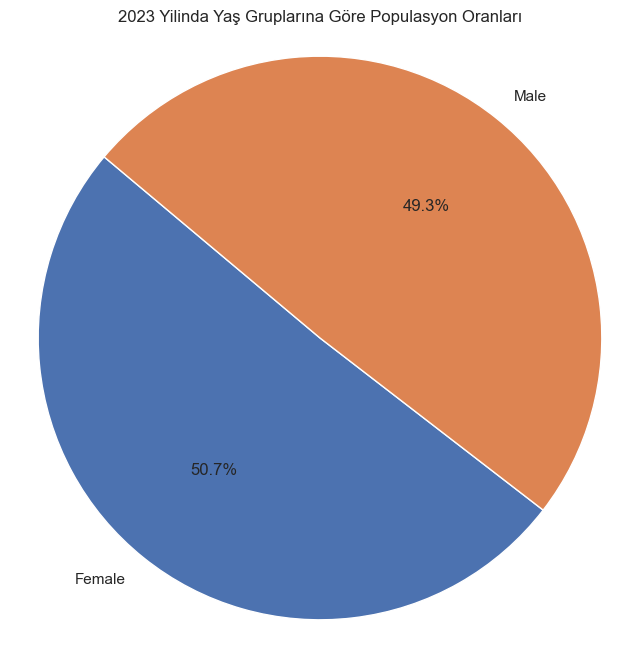

In [83]:
year = dropdown_year.value
age_group = dropdown_age_group.value
sex= dropdown_sex.value

# 'All ages' kategorisini hariç tut
df_filtered_sex = df[(df["Sex"] != "Both sexes") & (df["Year"] == year)]

# Yaş gruplarına göre 'Value' toplamlarını hesapla
age_group_totals = df_filtered_sex.groupby("Sex")["Value"].sum()

# Pasta grafiğini çiz
plt.figure(figsize=(8, 8))
plt.pie(age_group_totals, labels=age_group_totals.index, autopct='%1.1f%%', startangle=140)
plt.title(f'{year} Yilinda Yaş Gruplarına Göre Populasyon Oranları')
plt.axis('equal')  # Pasta grafiğini dairesel yap
plt.show()

## 3. Tek Değişkenli Analiz

In [23]:
# Yillik toplam nufusu gorebilecegimiz bir veri seti atiyoruz.
BothSexes_AllAges=df[(df["Sex"]=="Both sexes") & (df["Age Group"]=="All ages")]
#BothSexes_AllAges=BothSexes_AllAges[BothSexes_AllAges["Year"]>=2010]
#BothSexes_AllAges

In [24]:
#girdigimiz ozel yas grubuna gore yillik nufusu gorebilecegimiz bir veri seti atiyoruz.
BothSexes_SpecificAge=df[(df["Age Group"]=="65 years and over") & (df["Sex"]=="Both sexes")]
#BothSexes_SpecificAge

In [59]:
AllAges=df[(df["Age Group"]=="All ages")]

In [25]:
# cinsiyetlere gore yillik nufusu gorebilecegimiz veri setlerini atiyoruz.
df_male=df[(df["Age Group"]=="All ages") & (df["Sex"]=="Male")]
df_female=df[(df["Age Group"]=="All ages") & (df["Sex"]=="Female")]

#df_male
#df_female

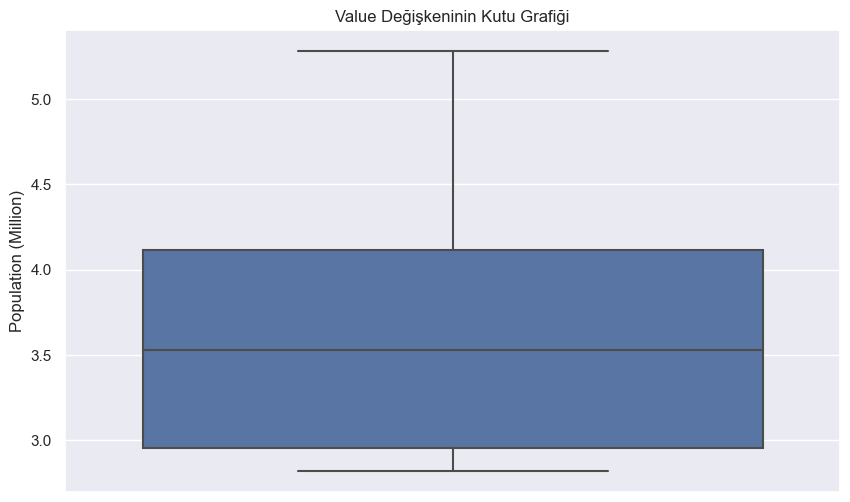

In [32]:
# 'Value' değişkeni yillik toplam nufus için bir kutu grafiği çiziyoruz.
plt.figure(figsize=(10, 6))
sns.boxplot(y=BothSexes_AllAges['Value'])
plt.title('Value Değişkeninin Kutu Grafiği')
plt.ylabel('Population (Million)')
plt.show()

## 4. İki Değişkenli Analiz

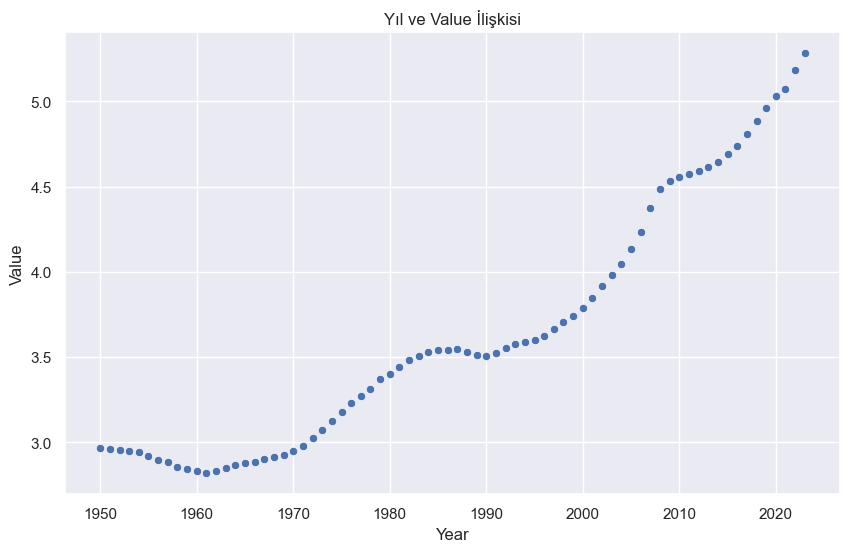

In [88]:
# 'Year' ve 'Value' arasında bir ilişki olup olmadığını görmek için bir scatter plot çizelim.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=BothSexes_AllAges['Year'], y=BothSexes_AllAges['Value'])
plt.title('Yıl ve Value İlişkisi')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

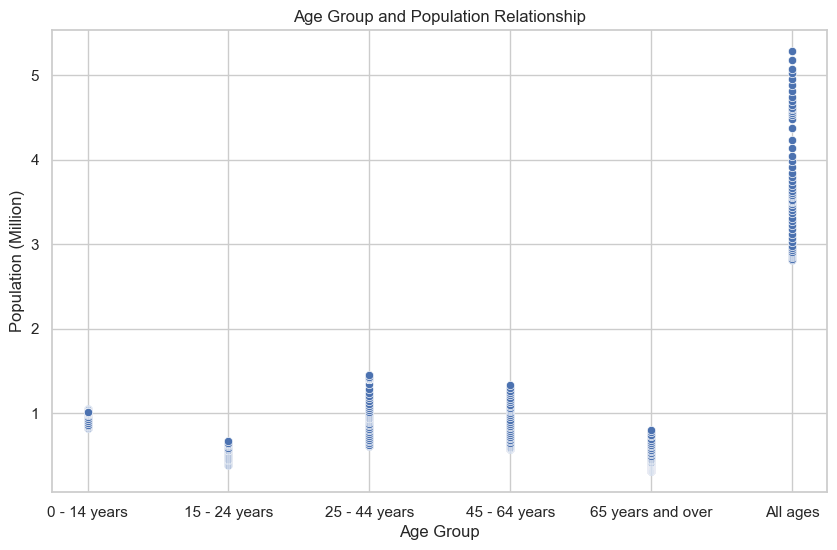

In [210]:
# 'Year' ve 'Value' arasında bir ilişki olup olmadığını görmek için bir scatter plot çizelim.
plt.figure(figsize=(10, 6))
df_filtered_AgeGroup=df[(df["Sex"]=="Both sexes")]
sns.scatterplot(x=df_filtered_AgeGroup['Age Group'], y=df_filtered_AgeGroup['Value'])
plt.title('Age Group and Population Relationship')
plt.xlabel('Age Group')
plt.ylabel('Population (Million)')
plt.show()

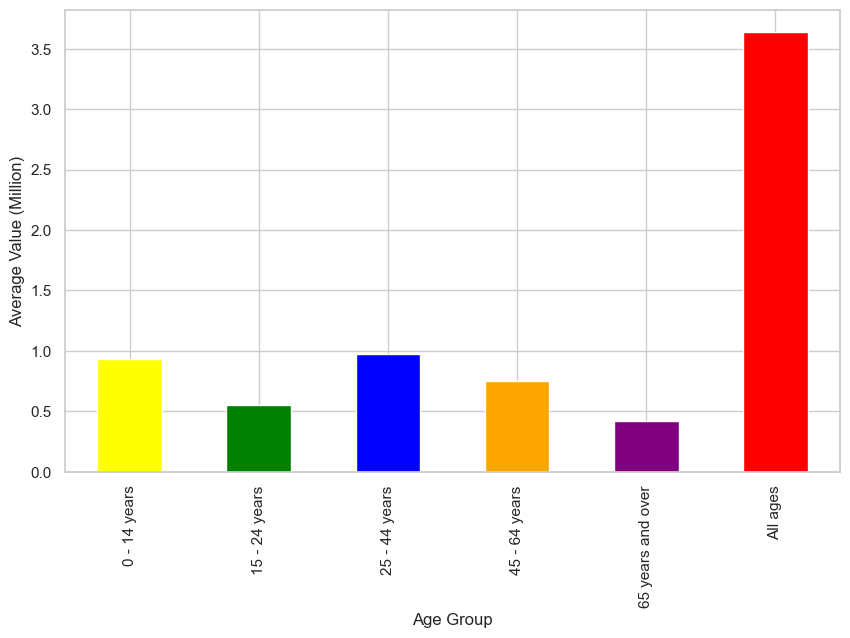

In [205]:
# Belirlediğiniz renk listesi
colors = ['yellow', 'green', 'blue', 'orange', 'purple','red']

# Her bir "Age Group" kategorisi için "VALUE" sütununun ortalamasını hesaplayalım
df_filtered_year=2023
#df_filtered_BothSexes=df[(df["Sex"]=="Both sexes") & (df["Year"]==df_filtered_year)]
#df_filtered_BothSexes=df[(df["Sex"]=="Both sexes") & (df["Age Group"]!="All ages")]
df_filtered_BothSexes=df[(df["Sex"]=="Both sexes")]
grouped_data = df_filtered_BothSexes.groupby('Age Group')['Value'].mean()

# Çubuk grafik oluşturalım ve belirlediğiniz renkleri kullanalım
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', ax=ax, color=colors , )
#ax.set_title(f"{df_filtered_year} Yilinda Yaş Gruplarına Göre Populasyon Oranları")
ax.set_xlabel("Age Group")
ax.set_ylabel("Average Value (Million)")
plt.show()

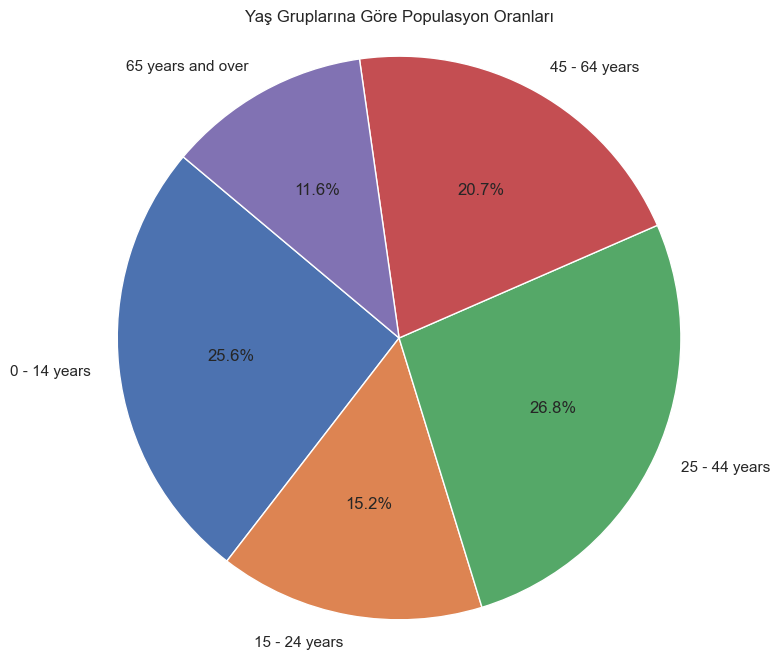

In [95]:
# 'All ages' kategorisini hariç tut
df_filtered_allages = df[df['Age Group'] != 'All ages']

# Yaş gruplarına göre 'Value' toplamlarını hesapla
age_group_totals = df_filtered_allages.groupby('Age Group')['Value'].sum()

# Pasta grafiğini çiz
plt.figure(figsize=(8, 8))
plt.pie(age_group_totals, labels=age_group_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Yaş Gruplarına Göre Populasyon Oranları')
plt.axis('equal')  # Pasta grafiğini dairesel yap
plt.show()

## 4. Üç Değişkenli Analiz

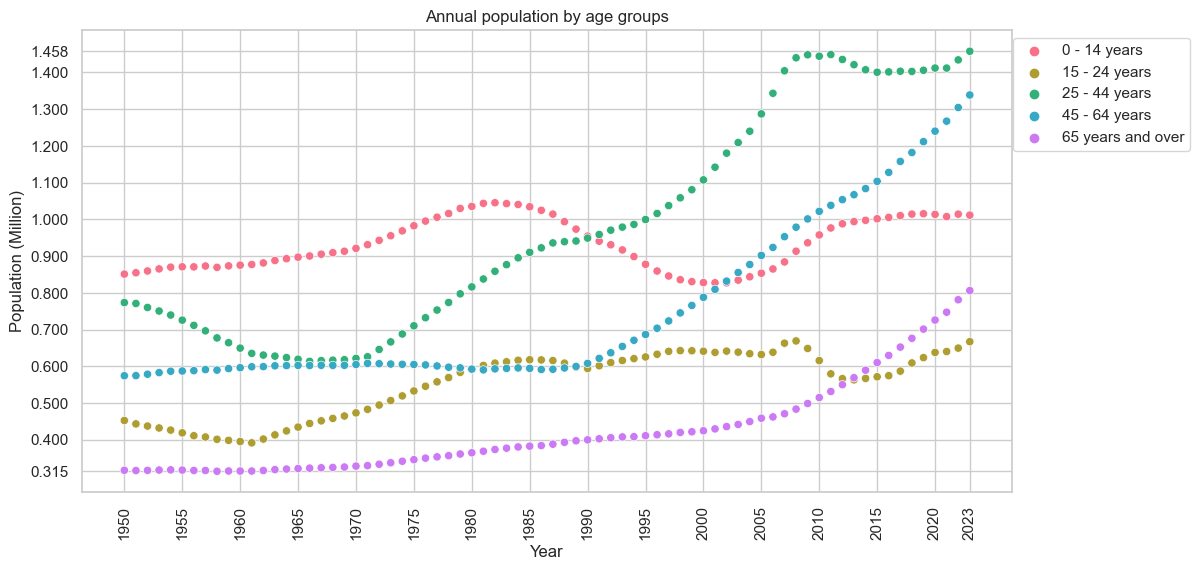

In [175]:
# Assigning a variable that excludes 'all ages' and 'both sexes'
filtered_df = df[(df["Sex"]== "Both sexes") & (df["Age Group"] != "All ages")]
plt.figure(figsize=(12,6))
sns.scatterplot(data=filtered_df, x="Year", y="Value", hue="Age Group", palette="husl")


#years = [str(year) for year in range(min(filtered_df["Year"]), max(filtered_df["Year"]), 5)]
#years.append("2023")

start_year = min(filtered_df["Year"])
end_year = max(filtered_df["Year"])
years = list(range(start_year, end_year + 1, 5))
years.append(end_year)
plt.xticks(ticks=years, rotation=90)

#Yıl değerlerinin doğru bir şekilde yuvarlanması.
step = 0.1  # Belirlediğiniz adım büyüklüğü
rounded_min_value = math.ceil(min(filtered_df["Value"]) * 10) / 10
values = list(np.arange(rounded_min_value, round(max(filtered_df["Value"]), 2), step))
values.insert(0,round(min(filtered_df["Value"]),3))
values.append(round(max(filtered_df["Value"]),3))
plt.yticks(ticks=values)

plt.title("Annual population by age groups")
plt.xlabel("Year")
plt.ylabel("Population (Million)")
plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))
plt.show()


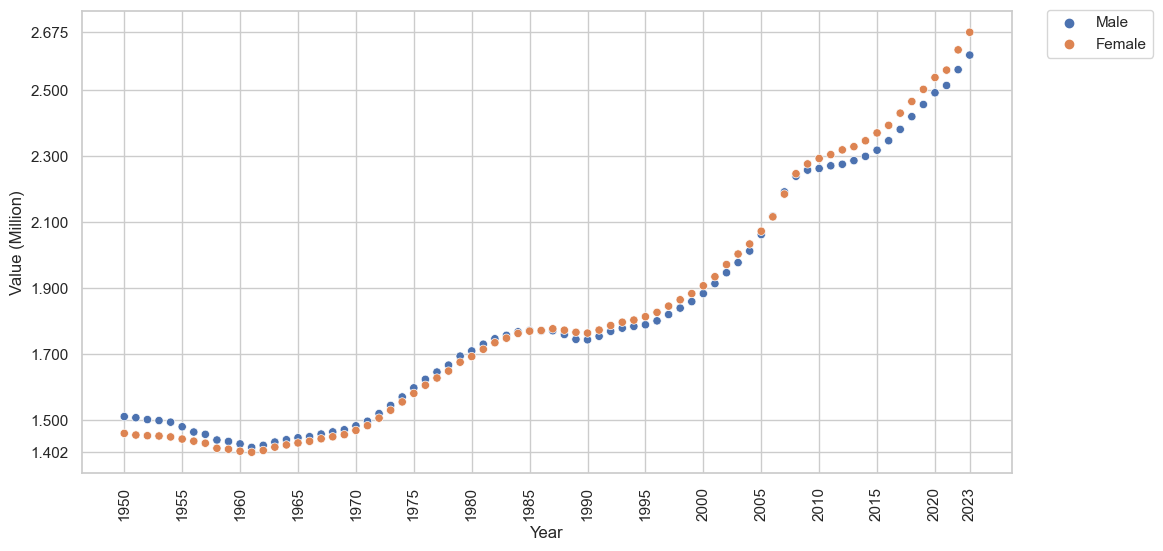

In [217]:
# Population distribution by years and sex
plt.figure(figsize=(12,6))
filtered_sex = df[(df["Sex"]!= "Both sexes") & (df["Age Group"] == "All ages")]
sns.scatterplot(data=filtered_sex,x="Year",y="Value",hue="Sex");

start_year = min(filtered_sex["Year"])
end_year = max(filtered_sex["Year"])
years = list(range(start_year, end_year + 1, 5))
years.append(end_year)
plt.xticks(ticks=years, rotation=90)

#Yıl değerlerinin doğru bir şekilde yuvarlanması.
step = 0.2  # Belirlediğiniz adım büyüklüğü
rounded_min_value = math.ceil(min(filtered_sex["Value"]) * 10) / 10
values = list(np.arange(rounded_min_value, round(max(filtered_sex["Value"]), 2), step))
values.insert(0,round(min(filtered_sex["Value"]),3))
values.append(round(max(filtered_sex["Value"]),3))
plt.yticks(ticks=values)

#plt.xticks(rotation=90);
plt.ylabel("Value (Million)")
plt.legend(loc="upper right",bbox_to_anchor=(1.16,1.02));

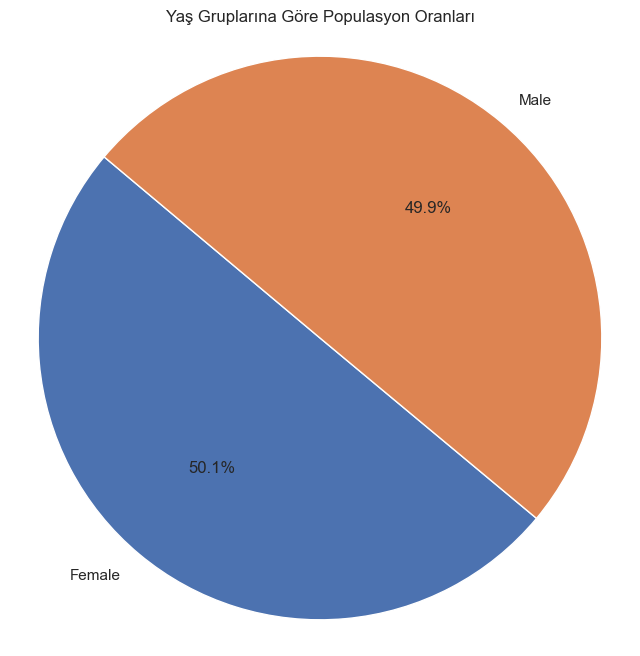

In [70]:
# 'All ages' kategorisini hariç tut
df_filtered_sex = df[df["Sex"] != "Both sexes"]

# Yaş gruplarına göre 'Value' toplamlarını hesapla
age_group_totals = df_filtered_sex.groupby("Sex")["Value"].sum()

# Pasta grafiğini çiz
plt.figure(figsize=(8, 8))
plt.pie(age_group_totals, labels=age_group_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Yaş Gruplarına Göre Populasyon Oranları')
plt.axis('equal')  # Pasta grafiğini dairesel yap
plt.show()

# Adım 5: Makine Öğrenimi için Veri Hazırlığı

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler


## Adım 1: Kategorik Değişkenler İçin One-Hot Encoding Uygulama

In [ ]:
# 'Age Group' ve 'Sex' sütunları için One-Hot Encoding uygulayalım
onehot_encoder = OneHotEncoder(sparse=False)
encoded_features = onehot_encoder.fit_transform(df[['Age Group', 'Sex']])

# One-hot encoded verileri DataFrame'e dönüştürelim
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(['Age Group', 'Sex']))

# Orijinal DataFrame ile encoded_df DataFrame'ini birleştirelim
df = df.join(encoded_df)

# Orjinal kategorik sütunları silelim
df = df.drop(['Age Group', 'Sex'], axis=1)


## Adım 2: Veri Setini Eğitim ve Test Seti Olarak Ayırma

In [ ]:
# DataFrame'deki tüm sütun adlarını listele
print(df.columns)

In [ ]:
# Veri setini X ve y olarak ayıralım
X = df.drop('Value', axis=1)  # 'target_column' hedef sütunun ismiyle değiştirilmeli
y = df['Value']

# Eğitim ve test setlerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Adım 3: Veri Normalizasyonu veya Standardizasyonu

In [ ]:
# StandardScaler veya MinMaxScaler kullanabiliriz

# Standardizasyon için:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# veya Normalizasyon için:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Hedef ve özellikleri belirleyin
y = df['Value']  # Hedef değişken
X = df.drop(['Value'], axis=1)  # Özellikler

# Veri setini eğitim ve test seti olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veri normalizasyonu/standardizasyonu (gerekiyorsa)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Tahmin yapma
y_pred = model.predict(X_test_scaled)

# Model performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

# Hiperparametre ayarlama için GridSearchCV
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# En iyi modelle tahmin yapma
y_pred_best = best_model.predict(X_test_scaled)

# En iyi modelin performansını değerlendirme
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model MSE: {mse_best}')
print(f'Best Model R2 Score: {r2_best}')


## Random Forest için GridSearchCV kullanarak hiperparametre ayarlaması yapmak

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Hiperparametreler için grid tanımı
param_grid = {
    'n_estimators': [100, 200, 300],  # Ağaç sayısını denemek için
    'max_depth': [None, 5, 10, 15],   # Maksimum derinlik için
    'min_samples_split': [2, 5, 10],   # Düğümü bölmek için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4]      # Bir yaprağın minimum örnek sayısı
}

# Random Forest Regressor için GridSearchCV oluşturma
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Eğitim veri seti ile GridSearchCV fit etme
grid_search_rf.fit(X_train_scaled, y_train)

# En iyi parametreleri ve modeli bulma
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

print("Random Forest için en iyi parametreler:", best_params_rf)

# En iyi modelle tahmin yapma ve performansı değerlendirme
y_pred_rf = best_model_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R2 Score: {r2_rf}')


In [ ]:
print(np.min(df["Value"]))
print(np.max(df["Value"]))
print(np.mean(df["Value"]))
print(np.median(df["Value"]))

In [108]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x,y

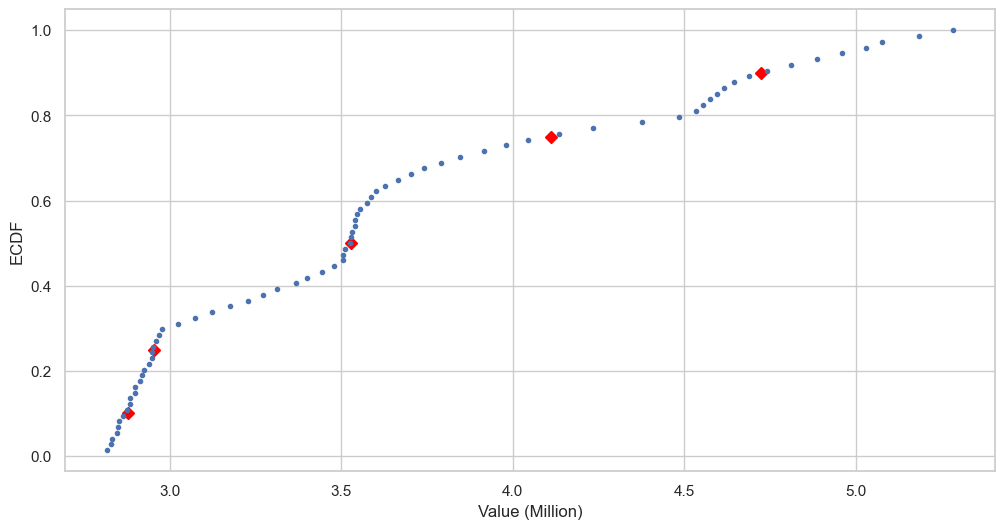

In [112]:
plt.figure(figsize=(12,6))
percentiles=np.array([10,25,50,75,90])
percentiles_value=np.percentile(BothSexes_AllAges["Value"],percentiles)
x_value,y_value=ecdf(BothSexes_AllAges["Value"])
plt.plot(percentiles_value, percentiles/100, marker='D', color='red',linestyle="none")
plt.plot(x_value,y_value,marker=".",linestyle="none")
plt.xlabel("Value (Million)")
plt.ylabel("ECDF")
plt.show()

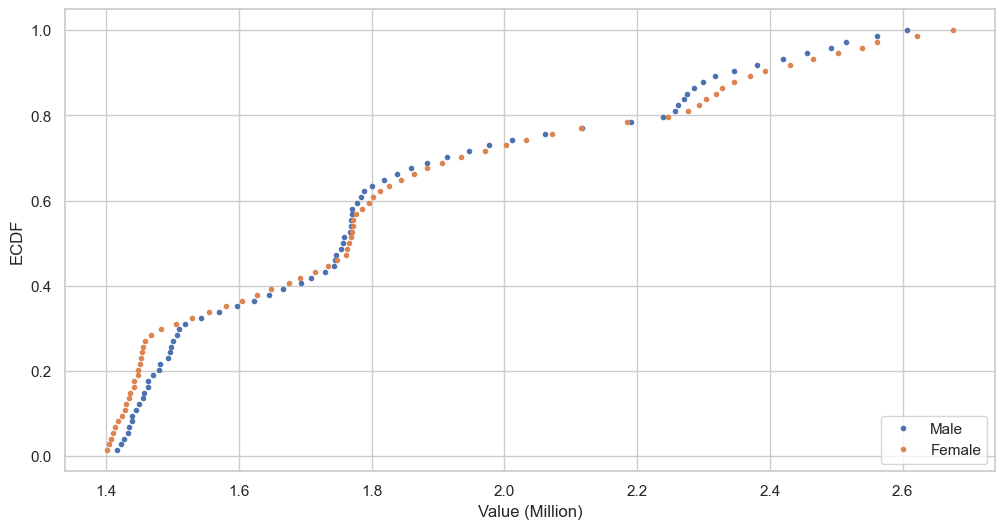

In [110]:
plt.figure(figsize=(12,6))
#x_both, y_both = ecdf(df[(df["Sex"]=="Both sexes") & (df["Age Group"]=="All ages")]["Value"])
x_male, y_male = ecdf(df[(df["Sex"]=="Male") & (df["Age Group"]=="All ages")]["Value"])
x_female, y_female = ecdf(df[(df["Sex"]=="Female") & (df["Age Group"]=="All ages")]["Value"])
#plt.plot(x_both, y_both, marker=".", linestyle="none")
plt.plot(x_male, y_male, marker=".", linestyle="none")
plt.plot(x_female, y_female, marker=".", linestyle="none")
#plt.legend(("Both sexes","Male","Female"),loc="lower right")
plt.legend(("Male","Female"),loc="lower right")
plt.xlabel("Value (Million)")
plt.ylabel("ECDF")
#plt.xticks(ticks=values)
plt.show()

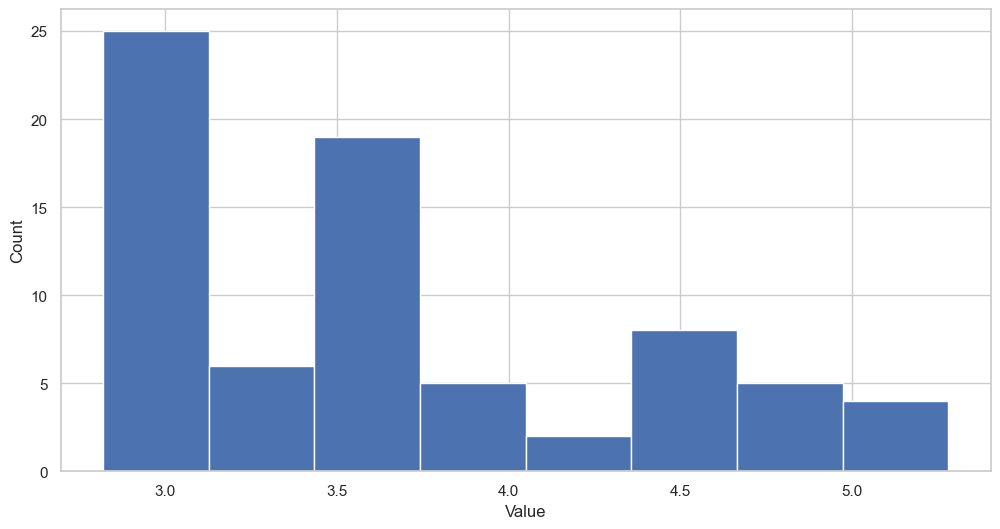

In [114]:
plt.figure(figsize=(12,6))
n_data=len(BothSexes_AllAges["Value"])
n_bins=np.sqrt(n_data)
n_bins=int(n_bins)
plt.hist(BothSexes_AllAges["Value"],n_bins)
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

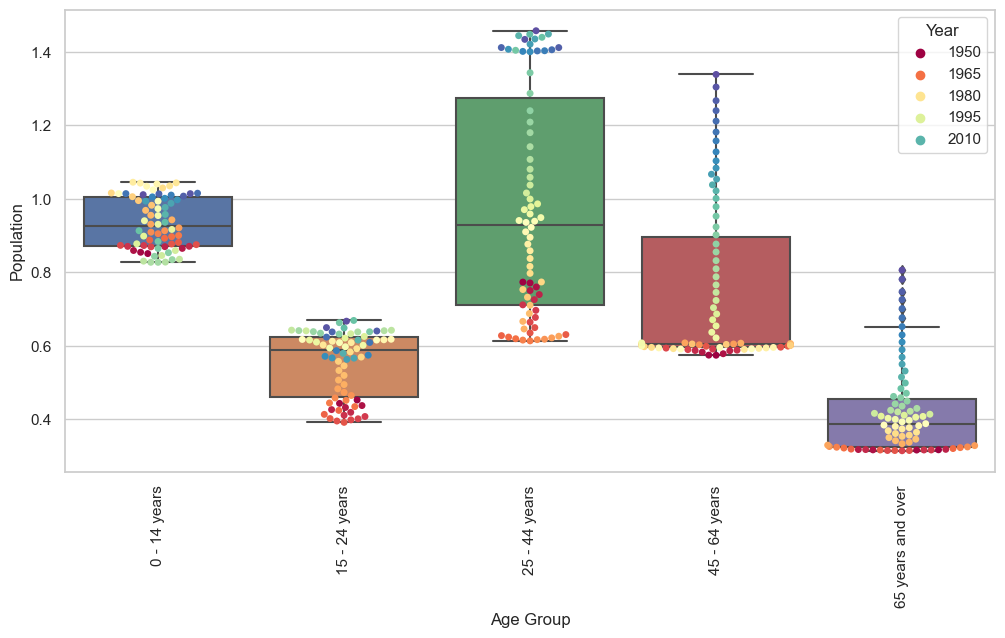

In [105]:
plt.figure(figsize=(12,6))

desired_age_groups = ['0 - 14 years', '15 - 24 years', '25 - 44 years', '45 - 64 years', '65 years and over']
sex_filter = df['Sex'] == 'Both sexes'
age_group_filter = df['Age Group'].isin(desired_age_groups)

filtered_df = df[sex_filter & age_group_filter]

sns.boxplot(x="Age Group", y="Value",data=filtered_df)
sns.swarmplot(x="Age Group", y="Value",data=filtered_df,hue="Year",palette="Spectral")

plt.xlabel("Age Group")
plt.ylabel("Population")
plt.xticks(rotation=90)
plt.show()

In [ ]:
from scipy.stats import binom

In [ ]:
# İlgili parametreler
n = 10  # Toplam deneme sayısı (kaç kez)
p = 0.2  # Her bir denemede başarılı olma olasılığı

# Belirli bir sayıda başarılı denemelerin olasılığını hesaplayın
x = 3  # Kaç kez başarılı olacağınızı belirtin
probability = binom.pmf(x, n, p)

# Sonucu yazdırın
print(f"2023 yılında '25 - 44 years' yaş grubunda, 'Male' cinsiyette belirli bir olayın {n} kez gerçekleşme olasılığı: {probability:.4f}")


In [ ]:
Q1=b["Value"].quantile(0.25)
Q3=b["Value"].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("IQR: (Million)",IQR)



In [ ]:
Q1=b["Value"].quantile(0.25)
Q3=b["Value"].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (b["Value"] < lower_bound) | (b["Value"] > upper_bound)
outliers_b = b[outliers]
outliers_list = b["Value"][outliers].tolist()

#outliers_b = b[outliers.any(axis=1)]

outliers_list


In [ ]:
sns.boxplot(x="Age Group", y="Value",data=b)
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import binom

# Veri setini yükleyin (örneğin, "veri.csv" dosyasını kullanarak)
#data = pd.read_csv("veri.csv")

# Aykırı değer sınırlarını tanımlayın
esik_deger = upper_bound  # Örneğin, aykırı değerler 10'un üzerinde kabul edilebilir

# Belirli bir yıl, yaş grubu ve cinsiyet için aykırı değer olma olasılığını hesaplayın
n = b["Value"].count()  # Toplam gözlem sayısı
p = len(b[b["Value"] > esik_deger]) / n  # Aykırı değer olma olasılığı

# Kaç aykırı değer olması gerektiğini belirtin
x = 6

# Binom dağılımı kullanarak olasılığı hesaplayın
probability = binom.pmf(x, n, p)

# Sonucu yazdır
print(f"Belirli bir yıl, yaş grubu ve cinsiyette {x} aykırı değer olma olasılığı: {probability:.4f}")


In [ ]:
# Belirli bir yıl, yaş grubu ve cinsiyet için ortalama olay hızını hesaplayın
ortalama_olay_hizi = b["Value"].mean()

# Kaç nadir olayın olması gerektiğini belirtin
x = 1

# Poisson dağılımı kullanarak olasılığı hesaplayın
probability = poisson.pmf(x, ortalama_olay_hizi)

# Sonucu yazdır
print(f"Belirli bir yıl, yaş grubu ve cinsiyette {x} nadir olayın olasılığı: {probability:.4f}")


In [ ]:
ortalama_olay_hizi = b["Value"].mean()

# En az 1 aykırı değer olma olasılığını hesaplayın
x = 0  # En az 1 aykırı değer olmaması gerektiği için x = 0
olasilik = 1 - poisson.cdf(x, ortalama_olay_hizi)
print(f"Belirli bir yıl 1 veya daha fazla aykırı değer olma olasılığı: {olasilik:.4f}")

In [ ]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix=np.cov(df_male["Value"],df_female["Value"])

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
Value_cov=covariance_matrix[0,1]

# Print the length/width covariance
print(Value_cov)


In [ ]:
def pearson_r(x,y):
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]

r=pearson_r(df_male["Value"],df_female["Value"])

# Print the result
print(r)

In [ ]:
def perform_bernoulli_trials(n, p):
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_numbers=rng.random()

        # If less than p, it's a success so add one to n_success
        if random_numbers<p:
            n_success+=1

    return n_success

In [ ]:
# Instantiate and seed random number generator
rng=np.random.default_rng(seed=42)

# Initialize the number of defaults: n_defaults
n_defaults=np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

In [ ]:
# Compute ECDF: x, y
x,y=ecdf(n_defaults)
# Plot the ECDF with labeled axes
plt.plot(x,y, marker=".",linestyle="none")
plt.xlabel("x")
plt.ylabel("y")


# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money=np.sum(n_defaults>=10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


In [ ]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults=rng.binomial(n=100,p=0.05,size=10000)

# Compute CDF: x, y
x,y=ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y,marker=".",linestyle="none")
plt.xlabel("the number of defaults out of 100 loans")
plt.ylabel("CDF")

# Show the plot
plt.show()


In [ ]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, bins=bins,density=True)

# Label axes
plt.xlabel("x")
plt.ylabel("y")

# Show the plot
plt.show()

In [ ]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson=rng.poisson(10,size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n=[20,100,1000]
p=[0.5,0.1,0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = rng.binomial(n[i],p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


In [ ]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters=rng.poisson(251/115,size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

# Compute probability of getting seven or more: p_large
p_large=n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


In [ ]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1=rng.normal(20,1,size=100000)
samples_std3=rng.normal(20,3,size=100000)
samples_std10=rng.normal(20,10,size=100000)

# Make histograms
plt.hist(samples_std1,density=True,histtype="step",bins=100)
plt.hist(samples_std3,density=True,histtype="step",bins=100)
plt.hist(samples_std10,density=True,histtype="step",bins=100)

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


In [ ]:
# Generate CDFs
x_std1, y_std1=ecdf(samples_std1)
x_std3, y_std3=ecdf(samples_std3)
x_std10, y_std10=ecdf(samples_std10)



# Plot CDFs
plt.plot(x_std1, y_std1, marker=".",linestyle="none")
plt.plot(x_std3, y_std3, marker=".",linestyle="none")
plt.plot(x_std10, y_std10, marker=".",linestyle="none")
# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


In [ ]:
# Compute mean and standard deviation: mu, sigma
mu=np.mean(a["Value"])
sigma=np.std(a["Value"])

# Sample out of a normal distribution with this mu and sigma: samples
samples=rng.normal(mu,sigma,size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor=ecdf(samples)
x,y = ecdf(a["Value"])

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Value (Million)')
_ = plt.ylabel('CDF')
plt.show()


In [ ]:
# Take a million samples out of the Normal distribution: samples
samples=rng.normal(mu,sigma,size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob=np.sum(samples<=144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


In [ ]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = rng.exponential(tau1,size)

    # Draw samples out of second exponential distribution: t2
    t2 = rng.exponential(tau2,size)

    return t1 + t2

In [ ]:
# Draw samples of waiting times: waiting_times
waiting_times= successive_poisson(764,715,size=100000)

# Make the histogram
plt.hist(waiting_times,density=True,histtype="step",bins=100)


# Label axes
plt.xlabel("time")
plt.ylabel("y")

# Show the plot
plt.show()


In [ ]:

sns.boxplot(x=a["Year"], y=a["Value"])

plt.show()


In [ ]:
sns.boxplot(x=a["Year"],y=a["Value"]);

In [98]:
#'Value' degeri icin quantile degiskenlerini atiyoruz.
Q1=BothSexes_SpecificAge["Value"].quantile(0.25) # birinci ceyrek degiskenini atiyoruz.
Q3=BothSexes_SpecificAge["Value"].quantile(0.75) # Ikinci ceyrek degiskenini atiyoruz.
IQR=Q3-Q1 # Interquartile range degiskenini atiyoruz.
lower_bound = Q1 - 1.5 * IQR # aykiri deger alt sinirini bir degiskene atiyoruz.
upper_bound = Q3 + 1.5 * IQR # Aykiri deger ust sinirini bir degiskene atiyoruz.
print(IQR) # Interquartile range degerini goruntuluyoruz.

outliers = (BothSexes_SpecificAge["Value"] < lower_bound) | (BothSexes_SpecificAge["Value"] > upper_bound) #Veri setimizdeki aykiri degerleri bir degiskene atiyoruz.
outliers_BothSexes_SpecificAge = BothSexes_SpecificAge[outliers] #

outliers_BothSexes_SpecificAge = BothSexes_SpecificAge[outliers.any(axis=1)]

outliers_BothSexes_SpecificAge

0.13142500000000001


ValueError: No axis named 1 for object type Series

In [99]:
Age_Group_Value_Counts=pd.crosstab(index=df["Age Group"],columns="Value")

In [100]:
from numpy import median, mean

In [101]:
Age_Group_Value_Counts

col_0,Value
Age Group,
0 - 14 years,222
15 - 24 years,222
25 - 44 years,222
45 - 64 years,222
65 years and over,222
All ages,222


In [102]:
sns.set(style="whitegrid")